In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


Training K-Fold: 1/55
Training K-Fold: 2/55
Training K-Fold: 3/55
Training K-Fold: 4/55
Training K-Fold: 5/55
Training K-Fold: 6/55
Training K-Fold: 7/55
Training K-Fold: 8/55
Training K-Fold: 9/55
Training K-Fold: 10/55
Training K-Fold: 11/55
Training K-Fold: 12/55
Training K-Fold: 13/55
Training K-Fold: 14/55
Training K-Fold: 15/55
Training K-Fold: 16/55
Training K-Fold: 17/55
Training K-Fold: 18/55
Training K-Fold: 19/55
Training K-Fold: 20/55
Training K-Fold: 21/55
Training K-Fold: 22/55
Training K-Fold: 23/55
Training K-Fold: 24/55
Training K-Fold: 25/55
Training K-Fold: 26/55
Training K-Fold: 27/55
Training K-Fold: 28/55
Training K-Fold: 29/55
Training K-Fold: 30/55
Training K-Fold: 31/55
Training K-Fold: 32/55
Training K-Fold: 33/55
Training K-Fold: 34/55
Training K-Fold: 35/55
Training K-Fold: 36/55
Training K-Fold: 37/55
Training K-Fold: 38/55
Training K-Fold: 39/55
Training K-Fold: 40/55
Training K-Fold: 41/55
Training K-Fold: 42/55
Training K-Fold: 43/55
Training K-Fold: 44/

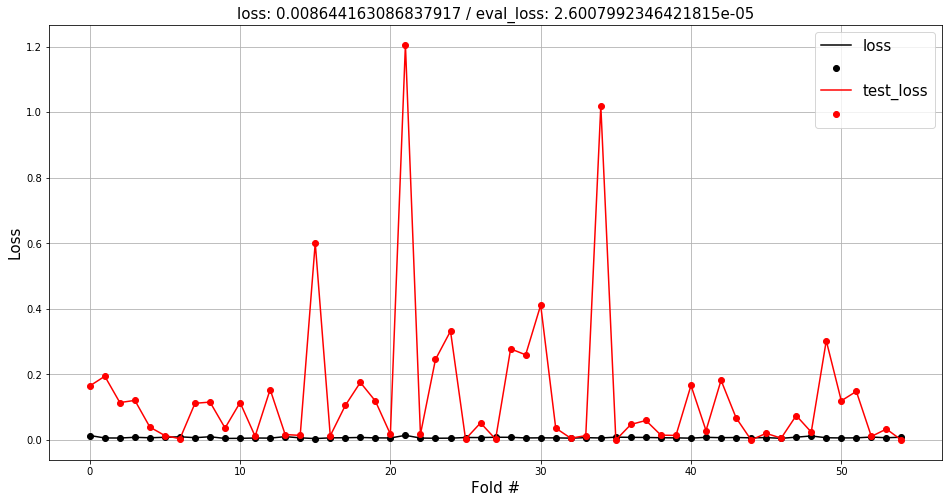

    Prediction      Real     % error
7     8.613093  8.770985    1.800155
25    7.051125  8.491036   16.958018
44    7.784057  8.434865    7.715691
11    8.950771  8.106093   10.420296
16    6.138241  8.075241   23.986902
39    7.625307  7.930000    3.842281
36    7.714146  7.693247    0.271655
17    7.951585  7.666291    3.721413
4     6.215771  7.084401   12.261173
28    6.788519  6.917610    1.866127
19    6.975548  5.928323   17.664786
20    4.419587  5.281612   16.321249
54    5.614809  5.156991    8.877627
34    5.189731  4.900166    5.909301
55    4.781754  4.794493    0.265709
1     3.770947  4.785659   21.203180
8     5.600207  4.764059   17.551171
37    5.294058  4.749780   11.459002
15    4.318107  4.616062    6.454747
6     4.863012  4.571799    6.369768
35    2.042720  4.564561   55.248266
5     4.010264  4.505757   10.996886
32    4.015607  4.492191   10.609177
12    4.595793  4.328178    6.183103
26    4.163281  4.297708    3.127870
29    4.986789  3.669486   35.898840
2

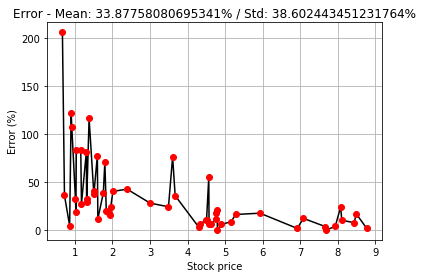

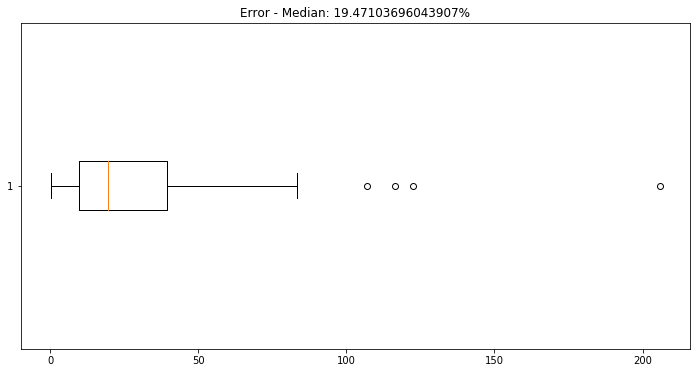

count     55.000000
mean      33.877581
std       38.602443
min        0.265709
25%        9.648962
50%       19.471037
75%       39.577136
max      205.815583
Name: % error, dtype: float64

Number of components: 16
Total variance: 0.9915861046249534
Components variance: [0.47639239 0.13606437 0.1001286  0.09091161 0.05367774 0.02912283
 0.02309418 0.02269186 0.01567147 0.00997968 0.00845847 0.00746384
 0.00551358 0.00483709 0.00430999 0.00326839]

Execution time
CPU times: user 10min 5s, sys: 29.3 s, total: 10min 35s
Wall time: 15min 13s


In [4]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

pca = PCA(.99)

# Get X and Y datasets
x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

pca_x = pca.fit_transform(x)

# LOOCV: k-fold cross validation (folds=x.shape[0], shuffle=True, seed=1)
kfold = KFold(pca_x.shape[0], True, 1)

# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']

# Run LOOCV and get results
results_loss, results_evaluate, prediction_results = tcc_utils.loocv(pca_x, y, kfold, gl_normal, 
                                                                     layers, activations, y_scaler)

# Evaluate results
tcc_utils.plot_loss_eval(results_loss, results_evaluate)
tcc_utils.show_results(prediction_results)
print('')
print(f'Number of components: {pca.n_components_}')
print(f'Total variance: {pca.explained_variance_ratio_.sum()}')
print(f'Components variance: {pca.explained_variance_ratio_}')
print('')
print('Execution time')